<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Grouping Data with Pandas

_Authors: Kiefer Katovich (SF), Dave Yerrington (SF), Mario Carrillo (SF)_

---

You are going to investigate UFO sightings around the US.  This lab will give you practice performing `groupby` operations to split data along multiple dimensions and investigate patterns between subsets of the data using basic aggregation.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Load and print the header for the UFO data.

In [2]:
ufo_csv = './datasets/ufo.csv'

In [3]:
ufo = pd.read_csv(ufo_csv)

In [4]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 2. How many null values exist per column?

In [5]:
ufo.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [6]:
ufo.shape

(80543, 5)

#### 3. Which city has the most observations?

In [7]:
ufo.groupby('City').apply(len).sort_values(ascending=False).head(10)

City
Seattle          646
New York City    612
Phoenix          533
Las Vegas        442
Portland         438
Los Angeles      416
San Diego        401
Houston          340
Chicago          337
Miami            279
dtype: int64

#### 4. What is the observation count per shape?

In [8]:
ufo['Shape Reported'].value_counts()

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
FLARE            1
PYRAMID          1
DOME             1
Name: Shape Reported, dtype: int64

#### 5. Create a subset of the data that is the top 5 cities and the top 5 shapes.

In [9]:
cities = ['Seattle','New York City','Phoenix','Las Vegas','Portland']
shapes = ['LIGHT','TRIANGLE','CIRCLE','FIREBALL','OTHER']
subset = ufo[ufo['City'].isin(cities) & ufo['Shape Reported'].isin(shapes)]

In [10]:
print ufo.shape
print subset.shape

(80543, 5)
(1322, 5)


#### 6. With the subset, find the percent of each shape seen by city.

In [11]:
counts = subset.groupby(['City','Shape Reported']).size()
counts

City           Shape Reported
Las Vegas      CIRCLE             42
               FIREBALL           22
               LIGHT              85
               OTHER              36
               TRIANGLE           31
New York City  CIRCLE             56
               FIREBALL           35
               LIGHT             105
               OTHER              42
               TRIANGLE           40
Phoenix        CIRCLE             34
               FIREBALL           35
               LIGHT             106
               OTHER              46
               TRIANGLE           45
Portland       CIRCLE             46
               FIREBALL           29
               LIGHT             100
               OTHER              29
               TRIANGLE           27
Seattle        CIRCLE             50
               FIREBALL           55
               LIGHT             129
               OTHER              51
               TRIANGLE           46
dtype: int64

In [12]:
counts = counts.reset_index()
counts.columns = ['city','shape','count']
counts['percent'] = counts.groupby('city')['count'].apply(lambda x: x/np.sum(x))

In [13]:
counts

,city,shape,count,percent
0,Las Vegas,CIRCLE,42,0.194444
1,Las Vegas,FIREBALL,22,0.101852
2,Las Vegas,LIGHT,85,0.393519
3,Las Vegas,OTHER,36,0.166667
4,Las Vegas,TRIANGLE,31,0.143519
5,New York City,CIRCLE,56,0.201439
6,New York City,FIREBALL,35,0.125899
7,New York City,LIGHT,105,0.377698
8,New York City,OTHER,42,0.151079
9,New York City,TRIANGLE,40,0.143885


**7. Make a grouped bar chart with your subset data showing counts of shapes seen by city.**

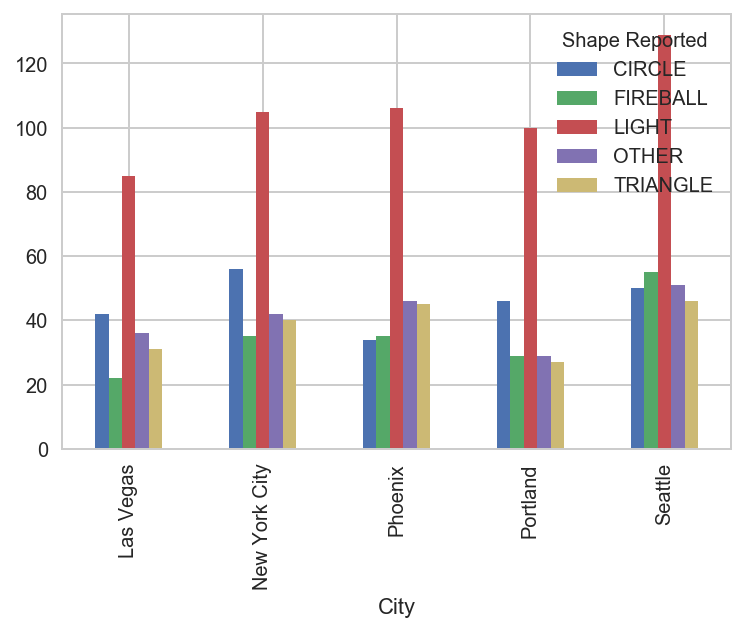

In [14]:
subset.groupby(['City','Shape Reported']).size().unstack().plot(kind='bar')